

# **Contours**

1. Using findContours
2. Drawing Contours
3. Hierachy of Contours
4. Contouring Modes (Simple vs Approx)

In [2]:
# Our Setup, Import Libaries, Create our Imshow Function
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

## **What are Contours?**
Contours are continous lines or curves that bound or cover the full boundary of an object.

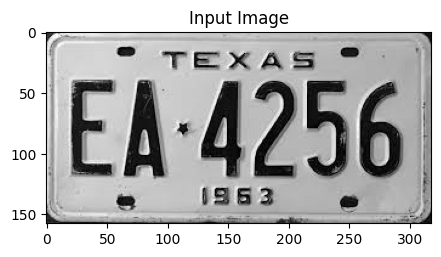

In [4]:
# Let's load a simple image license plate image
image = cv2.imread('contout.jpeg')
imshow('Input Image', image)

#### **Applying cv2.findContours()**

```cv2.findContours(image, Retrieval Mode, Approximation Method)```

**Retrieval Modes**
- **RETR_LIST** - Retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. ie they all belongs to same hierarchy level.
- **RETR_EXTERNAL** - eturns only extreme outer flags. All child contours are left behind.
- **RETR_CCOMP** - This flag retrieves all the contours and arranges them to a 2-level hierarchy. ie external contours of the object (ie its boundary) are placed in hierarchy-1. And the contours of holes inside object (if any) is placed in hierarchy-2. If any object inside it, its contour is placed again in hierarchy-1 only. And its hole in hierarchy-2 and so on.
- **RETR_TREE** -  It retrieves all the contours and creates a full family hierarchy list.

**Approximation Method Options**
- cv2.CHAIN_APPROX_NONE – Stores all the points along the line(inefficient!)
- cv2.CHAIN_APPROX_SIMPLE – Stores the end points of each line




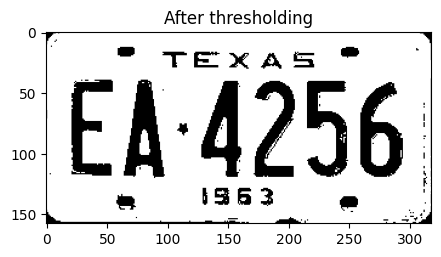

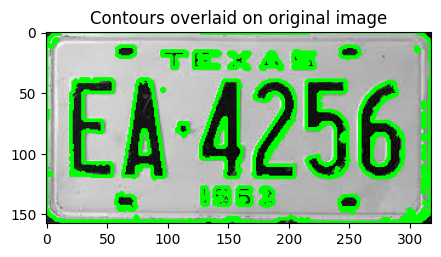

Number of Contours found = 130


In [5]:
image = cv2.imread('contout.jpeg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
# (0,255,0) represents the color green, thickness = pixel width
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))


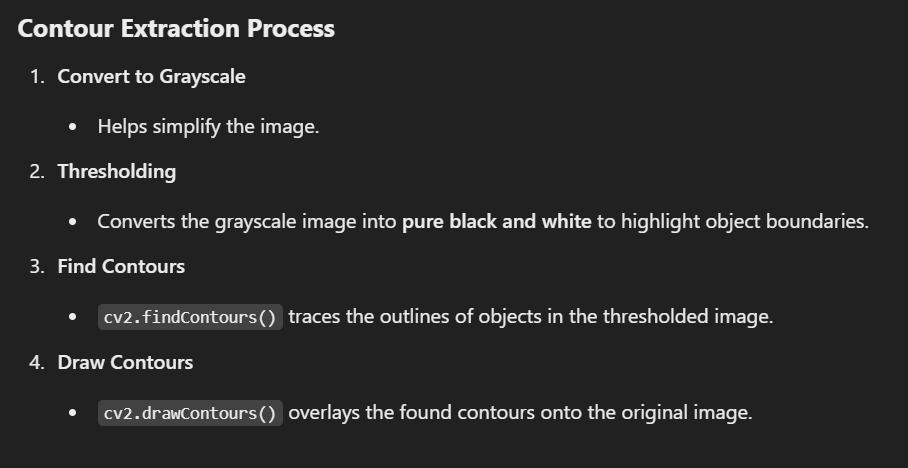

In [6]:
contours[0]  # list of (x,y) coordinates outlining the detected shape

array([[[292, 155]],

       [[293, 154]],

       [[294, 154]],

       [[295, 154]],

       [[296, 154]],

       [[297, 154]],

       [[298, 154]],

       [[299, 155]],

       [[298, 156]],

       [[297, 157]],

       [[296, 156]],

       [[295, 156]],

       [[294, 156]],

       [[293, 156]]], dtype=int32)

#### **What happens if we don't threshold?**

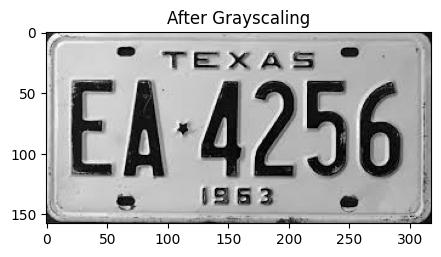

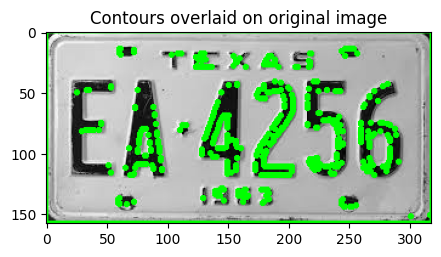

Number of Contours found = 358


In [8]:
image = cv2.imread('contout.jpeg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow('After Grayscaling', gray)

# Finding Contours
contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))

# Problem: because of the lack of distinct boundaries between values, only a few external contours are picked up
# after thresholding, distinct boundaries exist, so minor details are visible, each region is a sepaarte contour

# **NOTE: For findContours to work, the background has to be black and foreground (i.e. the text or objects)** has to be white/anything else

#### Otherwise you'll need to invert the image by using **cv2..bitwise_not(input_image)**

#### **We can use Canny Edges instead of Thresholding**

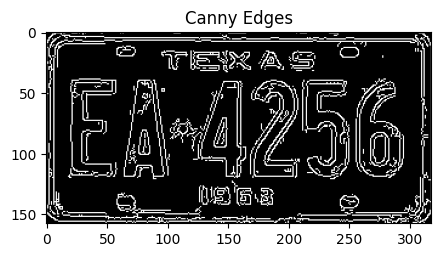

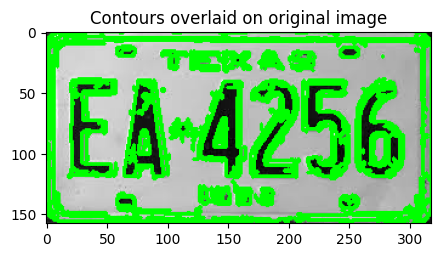

Number of Contours found = 194


In [9]:
image = cv2.imread('contout.jpeg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Canny Edges
edged = cv2.Canny(gray, 30, 200)
imshow('Canny Edges', edged)

# Finding Contours
contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))


## **Remember these Countouring Steps**

1. Grayscale
2. Threshold or Canny Edge Detection to Binarize image

**Note:** Blurring before Step 2 is recommended to remove noisy contours

# **Retreival Modes**

Official Doc - https://docs.opencv.org/master/d9/d8b/tutorial_py_contours_hierarchy.html

**Hierachry**

This array stores 4 values for each contour:
- First term is the index of the Next contour
- Second term is the index of the Previous contour
- Third term is the index of the parent contour
- Forth term is the index of the child contour

### **RETR_LIST**
Retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. ie they all belongs to same hierarchy level.

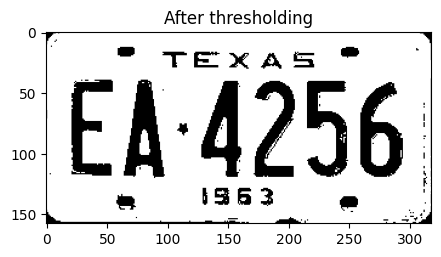

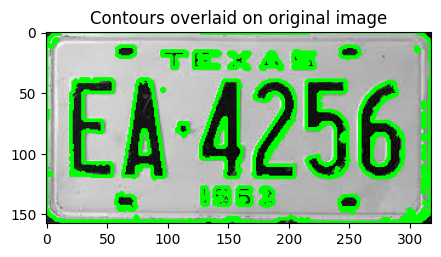

Number of Contours found = 130
[[[  1  -1  -1  -1]
  [  2   0  -1  -1]
  [  3   1  -1  -1]
  [  4   2  -1  -1]
  [  5   3  -1  -1]
  [  6   4  -1  -1]
  [  7   5  -1  -1]
  [  8   6  -1  -1]
  [  9   7  -1  -1]
  [ 10   8  -1  -1]
  [ 11   9  -1  -1]
  [ 12  10  -1  -1]
  [ 13  11  -1  -1]
  [ 14  12  -1  -1]
  [ 15  13  -1  -1]
  [ 16  14  -1  -1]
  [ 17  15  -1  -1]
  [ 18  16  -1  -1]
  [ 19  17  -1  -1]
  [ 20  18  -1  -1]
  [ 21  19  -1  -1]
  [ 22  20  -1  -1]
  [ 23  21  -1  -1]
  [ 24  22  -1  -1]
  [ 25  23  -1  -1]
  [ 26  24  -1  -1]
  [ 27  25  -1  -1]
  [ 28  26  -1  -1]
  [ 29  27  -1  -1]
  [ 30  28  -1  -1]
  [ 31  29  -1  -1]
  [ 32  30  -1  -1]
  [ 33  31  -1  -1]
  [ 34  32  -1  -1]
  [ 35  33  -1  -1]
  [ 36  34  -1  -1]
  [ 37  35  -1  -1]
  [ 38  36  -1  -1]
  [ 39  37  -1  -1]
  [ 40  38  -1  -1]
  [ 41  39  -1  -1]
  [ 42  40  -1  -1]
  [ 43  41  -1  -1]
  [ 44  42  -1  -1]
  [ 45  43  -1  -1]
  [ 46  44  -1  -1]
  [ 47  45  -1  -1]
  [ 48  46  -1  -1]
  [ 49  4

In [10]:
image = cv2.imread('contout.jpeg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_EXTERNAL**

Returns only extreme outer flags. All child contours are left behind.

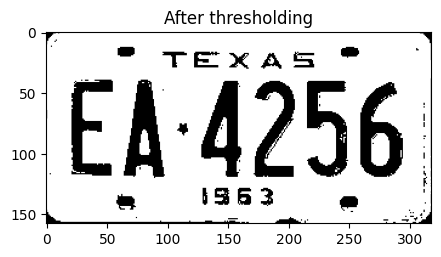

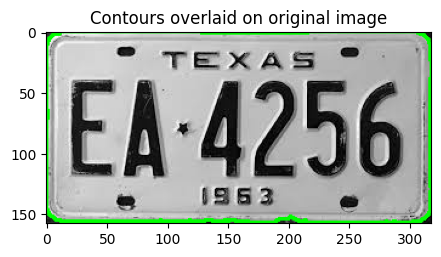

Number of Contours found = 1
[[[-1 -1 -1 -1]]]


In [11]:
image = cv2.imread('contout.jpeg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image, size = 10)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_CCOMP**

Retrieves all the contours and arranges them to a 2-level hierarchy. ie external contours of the object (ie its boundary) are placed in hierarchy-1. And the contours of holes inside object (if any) is placed in hierarchy-2. If any object inside it, its contour is placed again in hierarchy-1 only. And its hole in hierarchy-2 and so on.

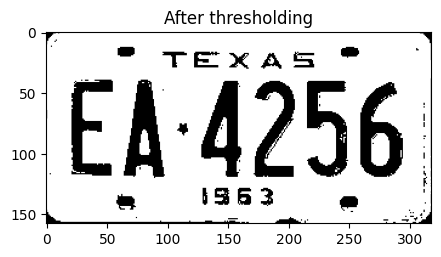

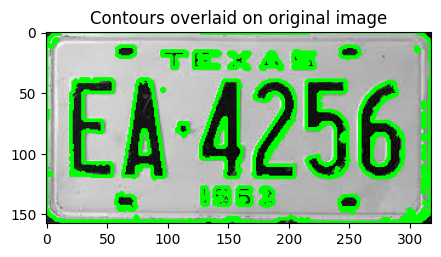

Number of Contours found = 130
[[[  1  -1  -1  -1]
  [  2   0  -1  -1]
  [  3   1  -1  -1]
  [  4   2  -1  -1]
  [  5   3  -1  -1]
  [  6   4  -1  -1]
  [  7   5  -1  -1]
  [  8   6  -1  -1]
  [  9   7  -1  -1]
  [ 10   8  -1  -1]
  [ 11   9  -1  -1]
  [ 12  10  -1  -1]
  [ 13  11  -1  -1]
  [ 14  12  -1  -1]
  [ 20  13  15  -1]
  [ 16  -1  -1  14]
  [ 17  15  -1  14]
  [ 18  16  -1  14]
  [ 19  17  -1  14]
  [ -1  18  -1  14]
  [ 21  14  -1  -1]
  [ 22  20  -1  -1]
  [ 23  21  -1  -1]
  [ 27  22  24  -1]
  [ 25  -1  -1  23]
  [ 26  24  -1  23]
  [ -1  25  -1  23]
  [ 28  23  -1  -1]
  [ 29  27  -1  -1]
  [ 30  28  -1  -1]
  [ 31  29  -1  -1]
  [ 32  30  -1  -1]
  [ 33  31  -1  -1]
  [ -1  32  34  -1]
  [ 35  -1  -1  33]
  [ 36  34  -1  33]
  [ 37  35  -1  33]
  [ 38  36  -1  33]
  [ 39  37  -1  33]
  [ 40  38  -1  33]
  [ 41  39  -1  33]
  [ 42  40  -1  33]
  [ 43  41  -1  33]
  [ 44  42  -1  33]
  [ 45  43  -1  33]
  [ 46  44  -1  33]
  [ 47  45  -1  33]
  [ 48  46  -1  33]
  [ 49  4

In [12]:
image = cv2.imread('contout.jpeg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_TREE**
It retrieves all the contours and creates a full family hierarchy list.

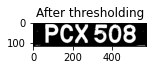

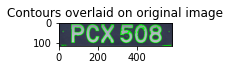

Number of Contours found = 38
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [17  9 11 -1]
  [12 -1 -1 10]
  [13 11 -1 10]
  [14 12 -1 10]
  [15 13 -1 10]
  [16 14 -1 10]
  [-1 15 -1 10]
  [25 10 18 -1]
  [19 -1 -1 17]
  [20 18 -1 17]
  [21 19 -1 17]
  [22 20 -1 17]
  [23 21 -1 17]
  [24 22 -1 17]
  [-1 23 -1 17]
  [32 17 26 -1]
  [27 -1 -1 25]
  [28 26 -1 25]
  [29 27 -1 25]
  [30 28 -1 25]
  [31 29 -1 25]
  [-1 30 -1 25]
  [35 25 33 -1]
  [34 -1 -1 32]
  [-1 33 -1 32]
  [36 32 -1 -1]
  [-1 35 37 -1]
  [-1 -1 -1 36]]]


In [ ]:
image = cv2.imread('images/LP.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

## **Contouring Modes**

#### **CHAIN_APPROX_NONE**

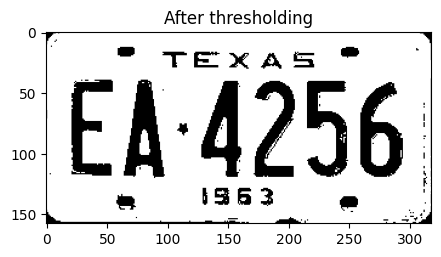

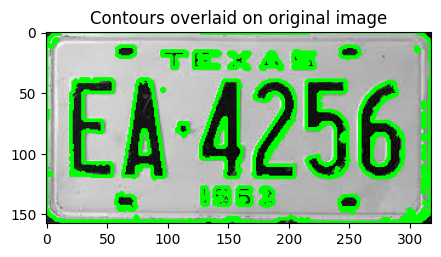

Number of Contours found = 130
917
14
10
4
4
18
4
9
4
8
4
7
4
4
6
6
4
4
4
4
4
4
42
60
8
53
2
61
9
59
1
1
1
12
33
4
4
17
4
4
10
4
6
6
6
12
4
6
4
4
4
6
6
4
8
6
7
6
4
6
4
4
6
4
4
30
10
14
4
6
6
6
6
4
4
4
220
10
1
65
4
4
4
4
4
1
1
4
293
10
3
9
2
3
1
270
198
55
4
6
4
4
213
47
2
1
2
312
4
8
4
4
4
4
4
4
31
46
14
65
4
77
113
63
7
39
39
4
4
4


In [13]:
image = cv2.imread('contout.jpeg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
for c in contours:
  print(len(c))
#lrger values - digits (bigger contours)


#### **CHAIN_APPROX_SIMPLE**

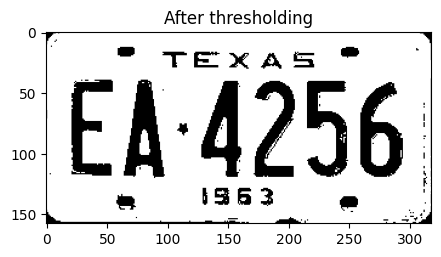

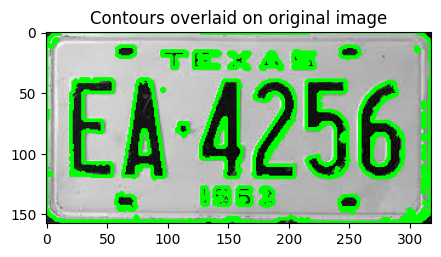

Number of Contours found = 130
133
7
6
4
4
6
4
7
4
6
4
6
4
4
6
6
4
4
4
4
4
4
16
32
6
38
2
20
6
27
1
1
1
9
12
2
4
11
4
4
8
4
6
6
6
6
4
6
4
4
4
6
6
4
6
6
6
6
4
6
4
4
6
4
4
23
6
6
4
6
6
6
6
4
4
4
109
2
1
18
4
4
4
4
4
1
1
4
88
10
3
4
2
3
1
128
72
22
4
6
4
4
73
19
2
1
2
84
2
6
4
4
4
4
4
4
7
36
11
41
4
22
40
22
6
17
14
4
4
4


In [15]:
image = cv2.imread('contout.jpeg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
for c in contours:
  print(len(c))
# stores the endpoints of each line